In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate
%matplotlib inline

## 单特征绘制分布图，kde核密度估计/gamma函数拟合，看数据分布
hist直方图没有上面的好

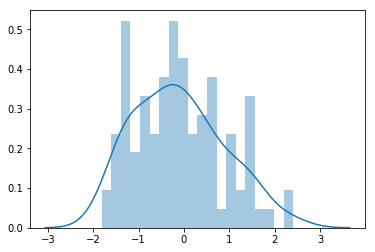

In [8]:
x = np.random.normal(size=100)
sns.distplot(x, kde=True, bins=20)

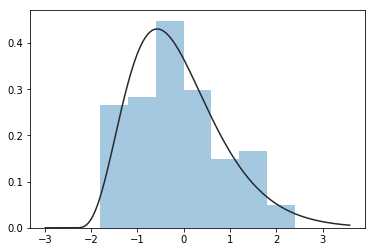

In [9]:
# 这里用 gamma函数去拟合连续随机变量的分布函数
sns.distplot(x, kde=False, fit=stats.gamma)

## 特征和特征间的分析， 用散点图/hex图(点多的时候用Hex更好)
#### sns.jointplot() 散点+直方图

In [10]:
# 根据均值和协方差生成数据
mean, cov = [0, 1], [(1, 0.5), (0.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
print(data.shape)
df = pd.DataFrame(data, columns=['x', 'y'])
df.head()

(200, 2)


,x,y
0,-0.772649,0.948590
1,-0.101158,1.072849
2,-0.170698,1.279412
3,-1.391825,-0.335916
4,1.210719,1.909165


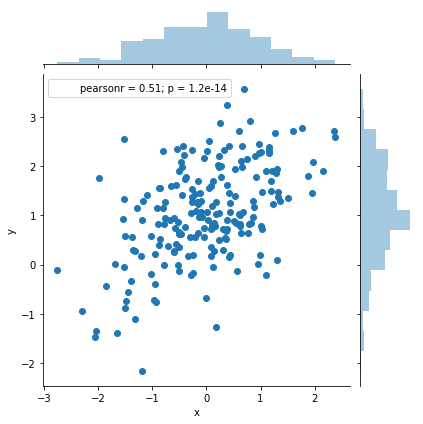

In [11]:
sns.jointplot(x='x', y='y', data=df)

(1000,) (1000,)


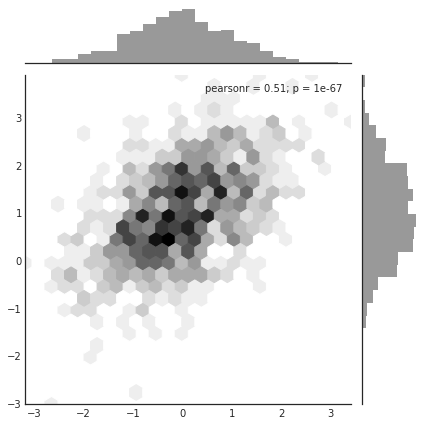

In [12]:
# 绘制Hex图的例子
x, y = np.random.multivariate_normal(mean, cov, 1000).T
print(x.shape, y.shape)
with sns.axes_style('white'):
    sns.jointplot(x=x, y=y, kind='hex', color='k')

## 多个特征, 看两辆之间的关系 pairplot()

(150, 5)


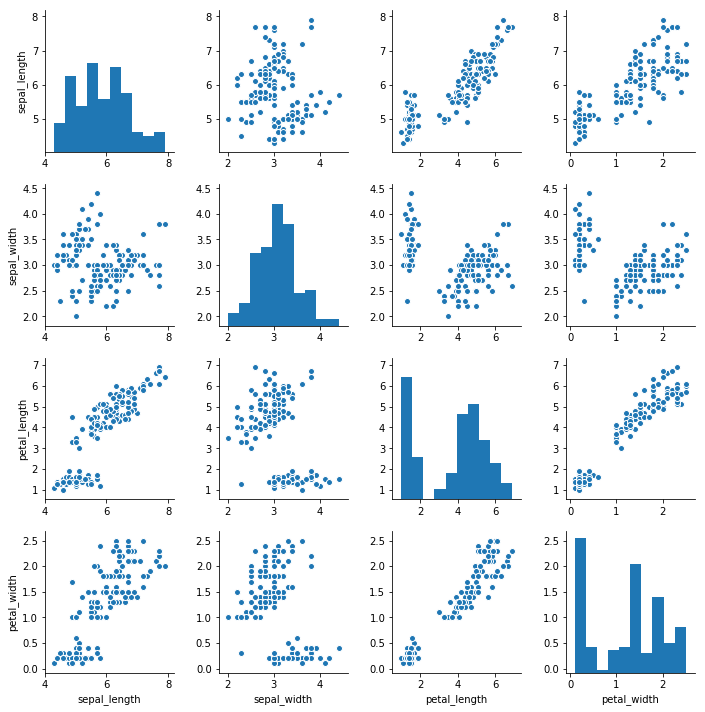

In [14]:
iris = sns.load_dataset('iris')
print(iris.shape)
sns.pairplot(iris)

In [17]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 回归绘图分析 regplot() 和 lmplot()
#### 推荐 regplot()

In [19]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


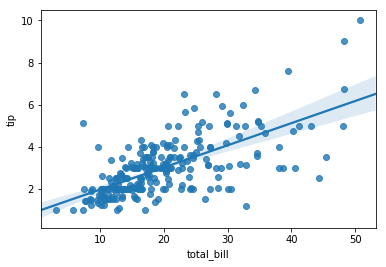

In [20]:
sns.regplot(x='total_bill', y='tip', data=tips)

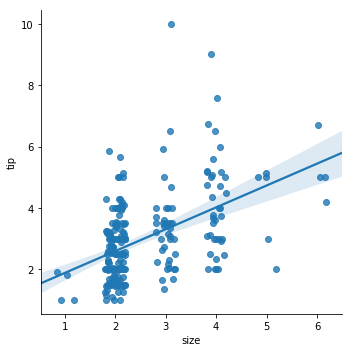

In [24]:
sns.lmplot(data=tips, x='size', y='tip', x_jitter=0.2)

# 多变量分析绘图

In [25]:
sns.set(style='whitegrid', color_codes=True)
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

### sns.stripplot(, jitter=True)

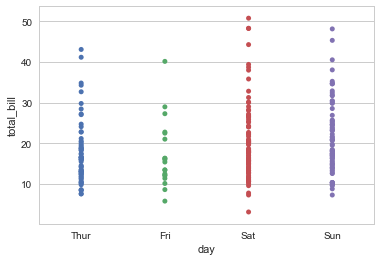

In [26]:
# 不太推荐, 可以加jitter改善
sns.stripplot(x='day', y='total_bill', data=tips)

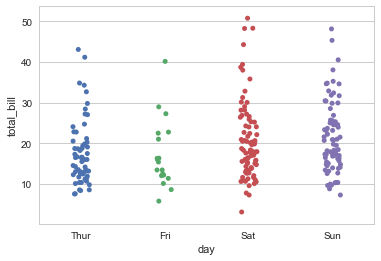

In [27]:
# 加了jitter改善
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)

### sns.swarmplot()

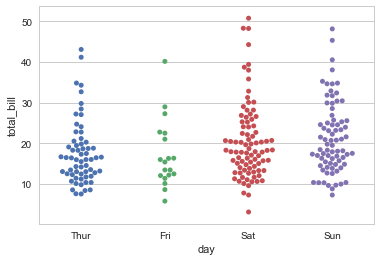

In [28]:
sns.swarmplot(x='day', y='total_bill', data=tips)

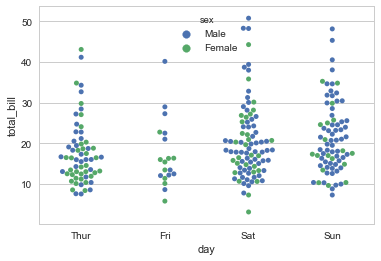

In [32]:
# 加参数 hue 色彩也可以指定成一维数据
sns.swarmplot(x='day', y='total_bill', data=tips, hue='sex')

### 盒图 sns.boxplot()
* IQR 即 四分位矩的概念, 第一四分卫与第三四分卫之间的距离
* N=1.5 * IQR , 大于Q3+N 或 小于 Q1-N 的点视为离群点

C:\Users\fangyang\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


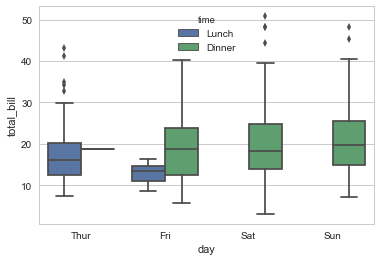

In [33]:
sns.boxplot(x='day', y='total_bill', hue='time', data=tips)

### 小提琴图 sns.violinplot()

C:\Users\fangyang\Anaconda3\lib\site-packages\seaborn\categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
C:\Users\fangyang\Anaconda3\lib\site-packages\seaborn\categorical.py:942: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])


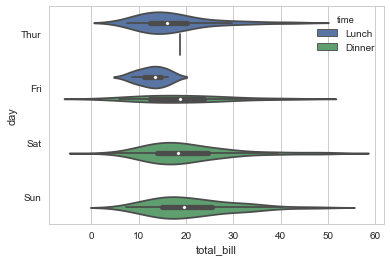

In [41]:
sns.violinplot(x='total_bill', y='day', hue='time', data=tips)

C:\Users\fangyang\Anaconda3\lib\site-packages\seaborn\categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
C:\Users\fangyang\Anaconda3\lib\site-packages\seaborn\categorical.py:895: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
C:\Users\fangyang\Anaconda3\lib\site-packages\seaborn\categorical.py:915: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


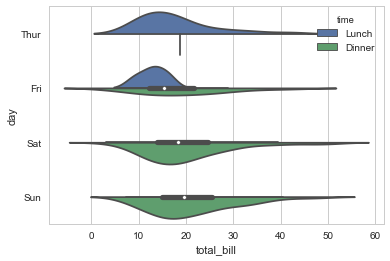

In [36]:
# 加了 split 参数的小提琴图
sns.violinplot(x='total_bill', y='day', hue='time', data=tips, split=True)

### 小提琴+扫把图

C:\Users\fangyang\Anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)


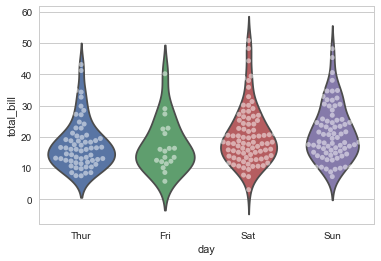

In [44]:
sns.violinplot(x='day', y='total_bill', data=tips, inner=None)
sns.swarmplot(x='day', y='total_bill', data=tips, color='w', alpha=0.5)

### 柱形图,显示值的 *集中* 趋势

C:\Users\fangyang\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


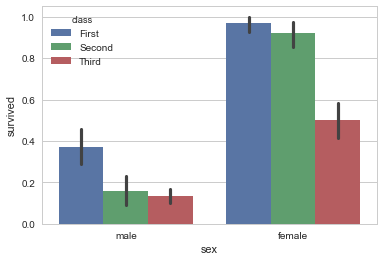

In [45]:
sns.barplot(x='sex', y='survived', hue='class', data=titanic)
# 黑线表示95%置信区间

In [46]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 点图, 描述变化差异

C:\Users\fangyang\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


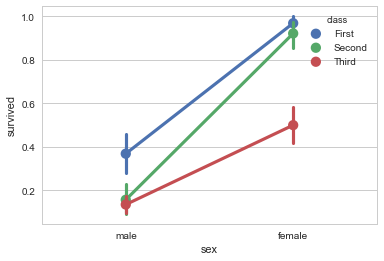

In [47]:
# 比如这里可以看出男女之间的差异
sns.pointplot(x='sex', y='survived', hue='class', data=titanic)

C:\Users\fangyang\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


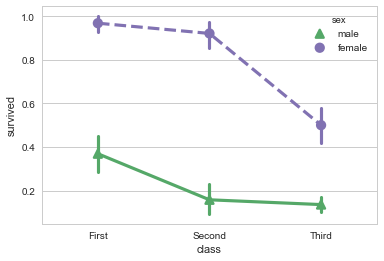

In [55]:
sns.pointplot(x='class', y='survived', hue='sex',data=titanic,
             palette={'male':'g', 'female':'m'},
             markers=["^", "o"], linestyles=['-', '--'])

### 宽形数据 , 横躺盒图

C:\Users\fangyang\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


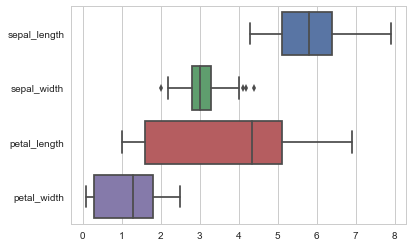

In [56]:
sns.boxplot(data=iris, orient='h')

### 多层面板分类图

C:\Users\fangyang\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


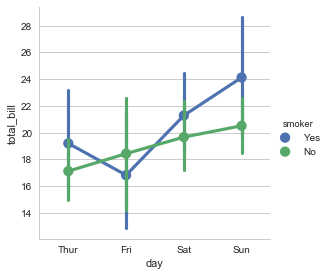

In [57]:
sns.factorplot(x='day', y='total_bill', hue='smoker', data=tips)

C:\Users\fangyang\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


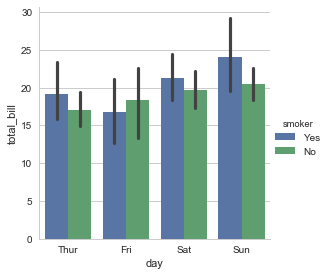

In [61]:
# 指定kind='bar'
sns.factorplot(x='day', y='total_bill', hue='smoker', data=tips, kind='bar')

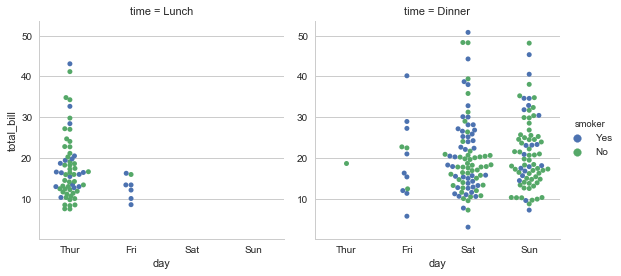

In [63]:
sns.factorplot(x='day', y='total_bill', hue='smoker',
               data=tips, kind='swarm', col='time')

C:\Users\fangyang\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


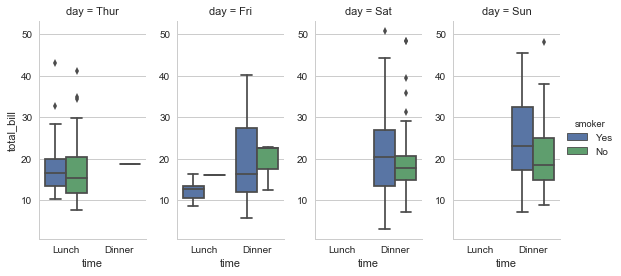

In [66]:
sns.factorplot(x='time', y='total_bill', hue='smoker',
               data=tips, kind='box', col='day', size=4, aspect=0.5)

# FaceGrid() 站个位图 方便展示子集?

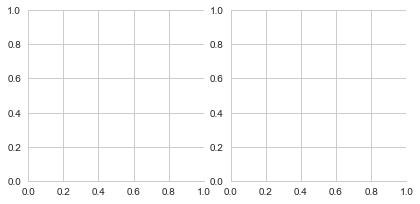

In [67]:
g = sns.FacetGrid(tips, col='time')

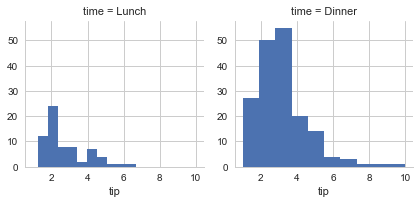

In [69]:
g = sns.FacetGrid(tips, col='time') # 这句必须得写这, 要不报错啊
g.map(plt.hist, 'tip')

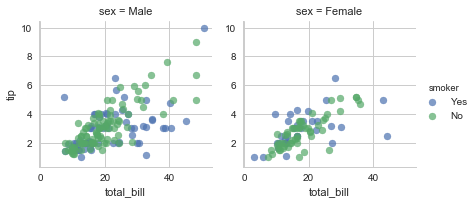

In [70]:
g = sns.FacetGrid(tips, col='sex', hue='smoker')
g.map(plt.scatter, 'total_bill', 'tip', alpha=0.7)
g.add_legend()

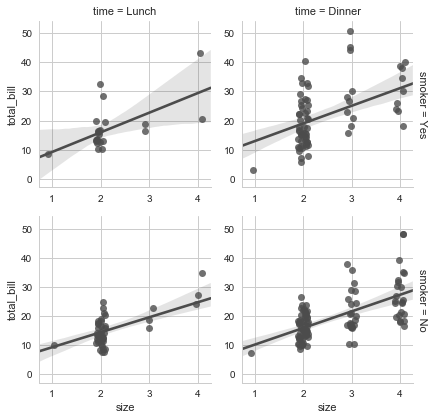

In [72]:
g = sns.FacetGrid(tips, row='smoker', col='time', margin_titles=True)
g.map(sns.regplot, 'size', 'total_bill', color='0.3', fit_reg=True, x_jitter=0.1)

C:\Users\fangyang\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


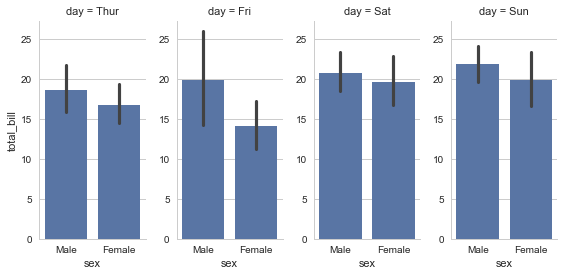

In [73]:
g = sns.FacetGrid(tips, col='day', size=4, aspect=0.5)
g.map(sns.barplot, 'sex', 'total_bill')

In [74]:
from pandas import Categorical

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')


C:\Users\fangyang\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


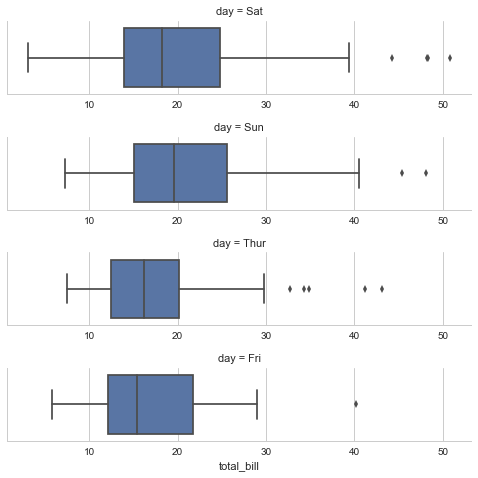

In [75]:
ordered_days = tips.day.value_counts().index
print(ordered_days)

g = sns.FacetGrid(tips, row='day', row_order=ordered_days,
                 size=1.7, aspect=4)
g.map(sns.boxplot, 'total_bill')

C:\Users\fangyang\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


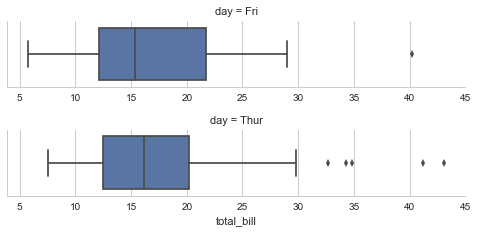

In [76]:
ordered_days = Categorical(['Fri','Thur'])

g = sns.FacetGrid(tips, row='day', row_order=ordered_days,
                 size=1.7, aspect=4)
g.map(sns.boxplot, 'total_bill')

# FaceGrid()绘制多变量